In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spaudiopy as spa
from pathlib import Path
import glob

In [3]:
# INPUT

# defining Parameters
N_sph = 2 # Ambisonics order
fs = 44100 #??

# input signal
file_path = '/Users/viautopia/Nextcloud/Applied Acoustics/A10p/HOA/' 

In [4]:
# loading signal 
in_path = glob.glob(file_path + '*.wav')
in_file= spa.io.load_audio(in_path, fs)
in_sig = in_file.get_signals()

in_sig = in_sig[0:9,:]

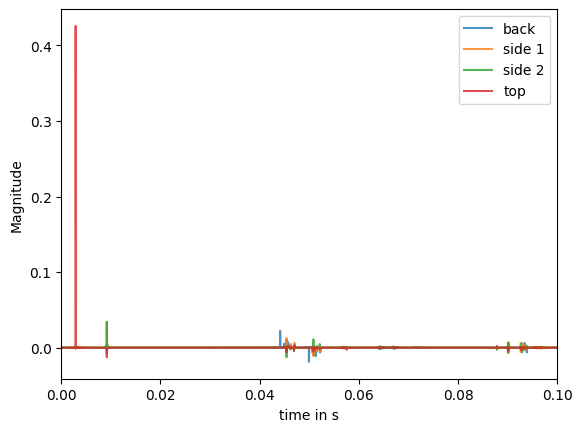

In [5]:
# defining steering directions of the beampattern
vec = np.array([[-1,0,0],[0,-1,0],[0,1,0],[0,0,1]]) #back, left, right, top

# conversion of vec: [x,y,z] to dir: [azi, zen]
dirs = spa.utils.vec2dir(vec) 

azi_steer = dirs[:,0]
zen_steer = dirs[:,1]

w_nm = spa.parsa.sh_beamformer_from_pattern('max_rE', N_sph,
                                          azi_steer, zen_steer)
x_nm = in_sig
y = spa.parsa.sh_beamform(w_nm, x_nm)

t = np.arange(len(y[0,:]))/fs

#back, left, right, top
fig, ax = plt.subplots()
ax.plot(t, y[0,:], label = 'back', alpha=0.8)
ax.plot(t, y[1,:], label = 'side 1', alpha= 0.8)
ax.plot(t, y[2,:], label = 'side 2', alpha=0.8)
ax.plot(t, y[3,:], label = 'top', alpha=0.8)

plt.xlim(0,0.1)
plt.xlabel('time in s')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [6]:
# find sample with max amplitude for IR start
#max_sample = np.max(in_sig, axis= 1)
#idx_max_sample = np.argmax(in_sig, axis = 1)
#values, counts = np.unique(idx_max_sample, return_counts = True)

#ind_max_sample = values[counts.argmax()]
#IR_start = ind_max_sample

IR_start = 0

start_sample = 15e-3*fs + IR_start
duration = 100e-3*fs
end_sample = start_sample + duration

y_cutted = y[:,round(start_sample):round(end_sample)]

#back, left, right, top

top = np.sum(y_cutted[3,:])
left = np.sum(y_cutted[2,:])
right = np.sum(y_cutted[1,:])
back = np.sum(y_cutted[0,:])

In [7]:
# von Linus

# Beschreibung des Parameters

# TS - Top/Sides(left,right)

TS = 10*np.log10((top)**2/(left + right)**2)
print('TS = ' + str(TS))

# TH - Top/Horizontal(left,right,back)

TH = 10*np.log10((top)**2/(left + right + back)**2)
print('TH = ' + str(TH))

TS = 5.048625006349868
TH = -1.6191021552197238


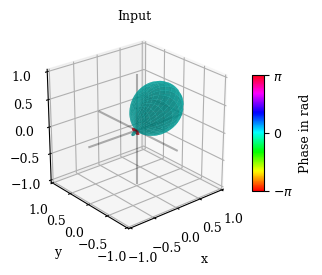

In [17]:
# Publication stuff
default_figsize = (3.39, 3.0)
plt.rcParams['figure.figsize'] = default_figsize
font = {'family' : 'serif',
        'size'   : 9}
plt.rc('font', **font)
plt.rcParams['axes.titlesize'] = 9

N_sph = 2
shtype = 'real'

ENREC = True  # amplitude or energy reconstruction
pattern = "maxRE"

# plot of Beamformer
Omega_in = np.c_[0, 1]
N_sph_in = N_sph
in_nm = spa.sph.sh_matrix(N_sph_in, Omega_in[:, 0], Omega_in[:, 1], shtype).conj()
in_nm = spa.sph.repeat_per_order(spa.sph.maxre_modal_weights(N_sph_in)) * in_nm  # make cardioid
#in_nm += spa.sph.sh_matrix(N_sph_in, Omega_in[:, 0]+np.pi/2, Omega_in[:, 1]+\
                           #np.pi/2, shtype).conj()  # add another

fig = plt.figure()
spa.plot.sh_coeffs(in_nm, title="Input", fig=fig)
ax = fig.gca()
